# PROJECT BY SHIVANGI PAL(DS2306)

1. WINE QUALITY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
Red_wine = pd.read_csv(r'C:\Users\hp\Downloads\winequality-red.csv')

In [6]:
# number of row and column

In [7]:
Red_wine.shape


(1599, 12)

In [8]:
# first 5 rows of the dataset

In [9]:
Red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# checking the missing value

In [11]:
Red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
Red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
# number of values fpr each quality

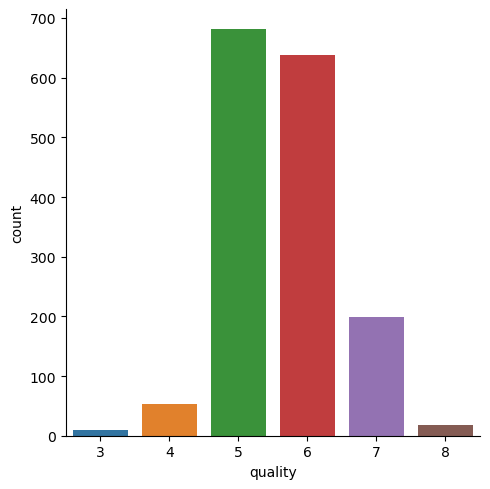

In [14]:
sns.catplot(x='quality' , data = Red_wine,kind = 'count')

In [15]:
# volatile acidity vs quality

<Axes: xlabel='quality', ylabel='volatile acidity'>

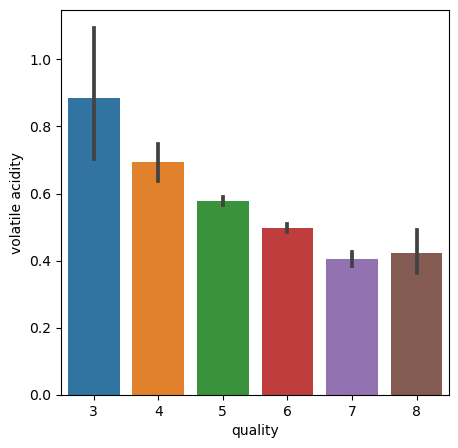

In [16]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'volatile acidity' , data = Red_wine)

In [17]:
#citric acid vs quality of the wine 

<Axes: xlabel='quality', ylabel='citric acid'>

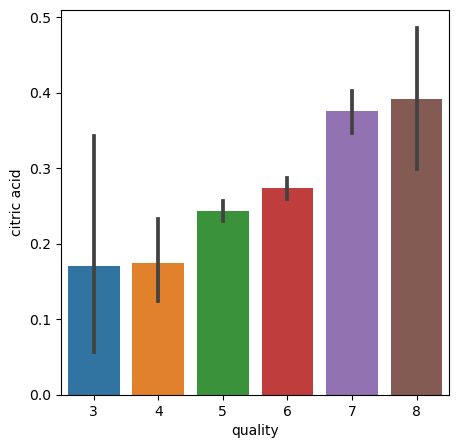

In [19]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y= 'citric acid' , data = Red_wine)

In [22]:
# correlation between the data - positive and negative

In [21]:
correlation = Red_wine.corr()

<Axes: >

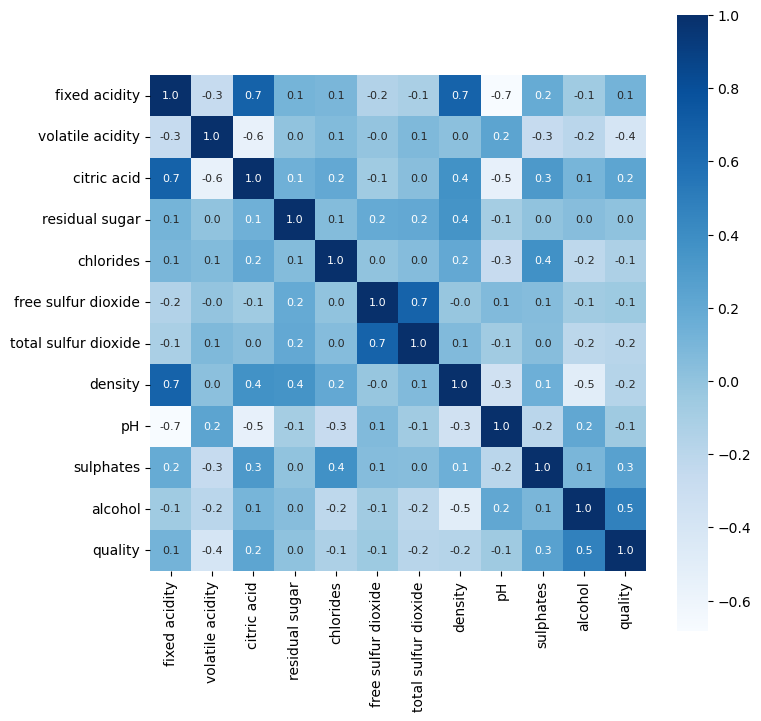

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar= True, square = True, fmt= '.1f', annot= True, annot_kws={'size':8}, cmap = 'Blues')

In [27]:
# Data preprocessing

In [28]:
# SEPERATE THE DATA AND LABEL

In [29]:
X = Red_wine.drop('quality',axis=1)

In [30]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [31]:
#Label Binarization

In [35]:
Y = Red_wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [36]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [37]:
# train and test split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [42]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [43]:
# model training:

In [44]:
model = RandomForestClassifier()

In [45]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [46]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [47]:
print('Accuracy :', test_data_accuracy)

Accuracy : 0.925


In [48]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)


In [49]:
# changing the input data into numpy array

In [50]:
input_data_as_numpy_array = np.asarray(input_data)

In [51]:
# reshape the numpy array as we are predicting the label for only one instance

In [53]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [54]:
prediction = model.predict(input_data_reshaped)

C:\Users\hp\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
print(prediction)

[1]


In [56]:
if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')
    

Good Quality Wine
